1. Importar librerias 

In [1]:
#Importar panda
import pandas as pd

#Importar Numpy
import numpy as np

#Importar warnings
import warnings
warnings.filterwarnings("ignore")

#Importar Seaborn
import seaborn as sb

#Importar Pylab

import pylab as plt

#Importar
%matplotlib inline

In [2]:
#Para pintar y ver el mapa de Calor
def check_nan(df: pd.DataFrame) -> None:
    
    nan_cols  = df.isna().mean()*100
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10,6))

    sb.heatmap(df.isna(),
               yticklabels=False,
               cmap='viridis',
               cbar = False)

    plt.show();

2. Abrir Archivo y mostrar datos

In [3]:
# El ... ... ... del creador.
attacks = pd.read_csv('attacks.csv', encoding = 'latin1')

In [4]:
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
attacks.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6300.0,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
original order,6309.0,3155.999683,1821.396206,2.0,1579.0,3156.0,4733.0,6310.0


3. Mirar los datos de las columnas

In [6]:
attacks.columns.values

array(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury',
       'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf',
       'href formula', 'href', 'Case Number.1', 'Case Number.2',
       'original order', 'Unnamed: 22', 'Unnamed: 23'], dtype=object)

In [7]:
#Corregir nombres de las columnas
attacks.columns = ['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_Y_N', 'Time',
       'Species', 'Investigator or Source', 'PDF', 'Href formula', 'Href',
       'Case Number.1', 'Case Number.2', 'Original Order', 'Unnamed: 22',
       'Unnamed: 23']
attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_Y_N', 'Time',
       'Species', 'Investigator or Source', 'PDF', 'Href formula', 'Href',
       'Case Number.1', 'Case Number.2', 'Original Order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
#nan_cols[nan_cols>0]

4. Empezar con la limpieza

In [9]:
attacks = attacks.drop_duplicates()
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,PDF,Href formula,Href,Case Number.1,Case Number.2,Original Order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#check_nan(attacks) Error por arreglar

In [11]:
attacks.shape

(6312, 24)

In [12]:
#attacks.dropna(inplace=True, subset=['dato']) ### Con esto se me quedaba en 1422 lineas, 
#me borra toda las lineas con un valor NaN por lo que como toda las lineas almenos contienen 1
#me quedaba con 1422

In [13]:
#attacks.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) 
#Borra toda las lineas

5. Cambiar los datos

In [14]:
attacks.info() #Ver la información de los datos que tenemos ahora

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6310 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal_Y_N               5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

<AxesSubplot:>

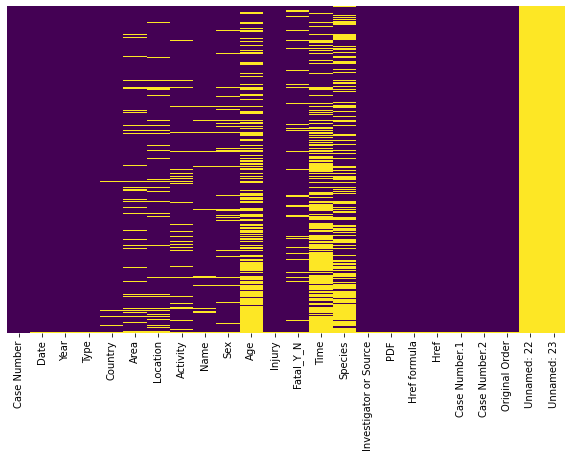

In [15]:
#En grafico, mapa de calor como quedaria
plt.figure(figsize=(10, 6))

sb.heatmap(attacks.isna(),
            yticklabels=False,
            cmap='viridis',
            cbar=False)

In [16]:
#Toca ahora un subset con lo más relevante
filtered_cols = attacks.columns.drop(["Case Number", "Original Order"])
data = attacks[attacks[filtered_cols].notnull().any(axis=1)]

In [17]:
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,PDF,Href formula,Href,Case Number.1,Case Number.2,Original Order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


Cada elemento que rasgos posee

In [18]:
#Date
data.Date.unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1900-1905',
       '1883-1889', '1845-1853'], dtype=object)

In [19]:
len(data.Date.unique())

5433

In [20]:
data.Date.info()

<class 'pandas.core.series.Series'>
Int64Index: 6302 entries, 0 to 6301
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
6302 non-null   object
dtypes: object(1)
memory usage: 98.5+ KB


In [21]:
#Year
data.Year.unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [22]:
len(data.Year.unique())

250

In [23]:
data.Year.info()

<class 'pandas.core.series.Series'>
Int64Index: 6302 entries, 0 to 6301
Series name: Year
Non-Null Count  Dtype  
--------------  -----  
6300 non-null   float64
dtypes: float64(1)
memory usage: 98.5 KB


In [24]:
#Type
data.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [25]:
len(data.Type.unique())

9

In [26]:
data.Type.info()

<class 'pandas.core.series.Series'>
Int64Index: 6302 entries, 0 to 6301
Series name: Type
Non-Null Count  Dtype 
--------------  ----- 
6298 non-null   object
dtypes: object(1)
memory usage: 98.5+ KB


In [27]:
#Country
data.Country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [28]:
len(data.Country.unique())

213

In [29]:
data.Country.info()

<class 'pandas.core.series.Series'>
Int64Index: 6302 entries, 0 to 6301
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
6252 non-null   object
dtypes: object(1)
memory usage: 98.5+ KB


In [30]:
#Area
data.Area.unique()

array(['California', 'Georgia', 'Hawaii', 'New South Wales', 'Colima',
       'Pernambuco', 'Florida', 'Queensland', 'South Carolina',
       'Cornwall', 'Westerm Australia', 'Eastern Cape Province',
       'Hua Hin', 'Cocos Island', 'Western Australia',
       'Alifu Alifu Atoll', 'Western Cape Province', 'New Providence',
       'Alagoas', nan, 'Victoria', 'KwaZulu-Natal',
       'Boi Island, Victoria', 'Galapagos Islands', 'Fernando de Noronha',
       'Sepang', 'Holquin Province', 'Pamplemousses ', 'South Australia',
       'North Island', 'New York', 'Canary Islands', ' Upolu Island',
       'Shizuoka Prefecture', 'Texas', 'Castellón', 'Massachusetts',
       'Red Sea Protectorate', 'New Providence District',
       '40 miles off Grand Bahama Island', 'Ascension Island',
       'New Jersey', 'Majorca', 'Washington', 'Tabasco', 'Anjouan',
       'Ibiza Island', 'Marquesas', 'South Devon', 'New Providence ',
       'Sharjah, ', 'Baja California Sur', 'Saint-Leu', 'South Island',
   

In [31]:
len(data.Area.unique())

826

In [32]:
data.Area.info()

<class 'pandas.core.series.Series'>
Int64Index: 6302 entries, 0 to 6301
Series name: Area
Non-Null Count  Dtype 
--------------  ----- 
5847 non-null   object
dtypes: object(1)
memory usage: 98.5+ KB


In [33]:
#Location
data.Location.unique()

array(['Oceanside, San Diego County', 'St. Simon Island, Glynn County',
       'Habush, Oahu', ..., 'Ocracoke Inlet', 'Panama Bay 8ºN, 79ºW',
       'Below the English fort, Trincomalee'], dtype=object)

In [34]:
len(data.Location.unique())

4109

In [35]:
data.Location.info()

<class 'pandas.core.series.Series'>
Int64Index: 6302 entries, 0 to 6301
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
5762 non-null   object
dtypes: object(1)
memory usage: 98.5+ KB


In [36]:
#Activity
data.Activity.unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [37]:
len(data.Activity.unique())

1533

In [38]:
data.Activity.info()

<class 'pandas.core.series.Series'>
Int64Index: 6302 entries, 0 to 6301
Series name: Activity
Non-Null Count  Dtype 
--------------  ----- 
5758 non-null   object
dtypes: object(1)
memory usage: 98.5+ KB


In [39]:
#Name
data.Name.unique()

array(['Julie Wolfe', 'Adyson\xa0McNeely ', 'John Denges', ...,
       'A "chiefess"', 'Ahmun', 'Jules Patterson'], dtype=object)

In [40]:
len(data.Name.unique())

5231

In [41]:
data.Name.info()

<class 'pandas.core.series.Series'>
Int64Index: 6302 entries, 0 to 6301
Series name: Name
Non-Null Count  Dtype 
--------------  ----- 
6092 non-null   object
dtypes: object(1)
memory usage: 98.5+ KB


In [42]:
#Age
data.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [43]:
len(data.Age.unique())

158

In [44]:
data.Age.info()

<class 'pandas.core.series.Series'>
Int64Index: 6302 entries, 0 to 6301
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
3471 non-null   object
dtypes: object(1)
memory usage: 98.5+ KB


In [45]:
#Sex
data.Sex.unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [46]:
len(data.Sex.unique())

7

In [47]:
data.Sex.info()

<class 'pandas.core.series.Series'>
Int64Index: 6302 entries, 0 to 6301
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
5737 non-null   object
dtypes: object(1)
memory usage: 98.5+ KB


In [48]:
#Species
data.Species.unique()

array(['White shark', nan, '2 m shark', ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

In [49]:
len(data.Species.unique())

1550

In [50]:
data.Species.info()

<class 'pandas.core.series.Series'>
Int64Index: 6302 entries, 0 to 6301
Series name: Species
Non-Null Count  Dtype 
--------------  ----- 
3464 non-null   object
dtypes: object(1)
memory usage: 98.5+ KB


In [51]:
#Time
data.Time.unique()

array(['18h00', '14h00  -15h00', '07h45', nan, 'Late afternoon', '17h00',
       '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30', '10h40',
       '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40', '08h00',
       '17h35', '15h30', '07h30', '19h00, Dusk', 'Night', '16h00',
       '15h01', '12h00', '13h45', '23h30', '09h00', '14h30', '18h30',
       '12h30', '16h30', '18h45', '06h00', '10h00', '10h44', '13h19',
       'Midday', '13h30', '10h45', '11h20', '11h45', '19h30', '08h30',
       '15h45', 'Shortly before 12h00', '17h34', '17h10', '11h15',
       '08h50', '17h45', '13h00', '10h20', '13h20', '02h00', '09h50',
       '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15', '15h40',
       '19h05', '1300', '14h30 / 15h30', '22h00', '16h20', '14h34',
       '15h25', '14h55', '17h46', 'Morning ', '15h49', '19h00',
       'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50',
       '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',
       '06h15', '14h

In [52]:
len(data.Time.unique())

367

In [53]:
data.Time.info()

<class 'pandas.core.series.Series'>
Int64Index: 6302 entries, 0 to 6301
Series name: Time
Non-Null Count  Dtype 
--------------  ----- 
2948 non-null   object
dtypes: object(1)
memory usage: 98.5+ KB


# HORA DE MOVILIZAR LAS COSAS, HORA DE ELIMINAR LO NO RELEVANTE Y RELLENAR LOS VALORES NULOS QUE CREA IMPORTANTES

Modificar para eliminar todo los valores nulos

In [54]:
#En las ultimas 2 columnas, con nombre de Unnamed: 22 y Unnamed: 23 en toda las filas pone NaN, a estos valores nulos
#Es hora de cambiarles los valores

data["Unnamed: 22"].fillna("Unknown", inplace=True)
data["Unnamed: 23"].fillna("Unknown", inplace=True)

In [55]:
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,PDF,Href formula,Href,Case Number.1,Case Number.2,Original Order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,Unknown,Unknown
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,Unknown,Unknown
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,Unknown,Unknown
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,Unknown,Unknown
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,Unknown,Unknown
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,Unknown,Unknown
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,Unknown,Unknown
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,Unknown,Unknown


### Case Number

In [56]:
#Rellenar los valores nulos de la columna "Case Number"

data["Case Number"].fillna("Unknown", inplace=True)

### Date, Year y Time

In [57]:
#Agrupamos las columnas de Date y Year en un mismo grupo al cual denominamos fehcas con el cual sera la que trabajaremos
#fechas = data[['Date', 'Year', 'Time']]
#fechas.head()

In [58]:
def quitar(string):
    
    if len(string) > 11:
        string = string[len(string)-11:len(string)]
    
    return string

In [59]:
data['Date'] = data['Date'].apply(quitar)
data['Date']

0       25-Jun-2018
1       18-Jun-2018
2       09-Jun-2018
3       08-Jun-2018
4       04-Jun-2018
           ...     
6297    Before 1903
6298    Before 1903
6299      1900-1905
6300      1883-1889
6301      1845-1853
Name: Date, Length: 6302, dtype: object

In [60]:
#Para modificar las columnas de Date y Year, para solo poner el año en el que ocurrio el ataque.
data['Year'] = data['Date'].apply(lambda x : x[len(x)-4:len(x)])
data['Year'] = data['Year'].apply(lambda x : 'No hay' if x == 'ente' else x)
list(data['Year'])

['2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 

In [61]:
for i in range(data.shape[0]):
    
    if data['Case Number.1'][i] == 'Unknown':
        data['Time'][i] = 'None'
        
list(data['Time'].unique())

['18h00',
 '14h00  -15h00',
 '07h45',
 nan,
 'Late afternoon',
 '17h00',
 '14h00',
 'Morning',
 '15h00',
 '08h15',
 '11h00',
 '10h30',
 '10h40',
 '16h50',
 '07h00',
 '09h30',
 'Afternoon',
 '21h50',
 '09h40',
 '08h00',
 '17h35',
 '15h30',
 '07h30',
 '19h00, Dusk',
 'Night',
 '16h00',
 '15h01',
 '12h00',
 '13h45',
 '23h30',
 '09h00',
 '14h30',
 '18h30',
 '12h30',
 '16h30',
 '18h45',
 '06h00',
 '10h00',
 '10h44',
 '13h19',
 'Midday',
 '13h30',
 '10h45',
 '11h20',
 '11h45',
 '19h30',
 '08h30',
 '15h45',
 'Shortly before 12h00',
 '17h34',
 '17h10',
 '11h15',
 '08h50',
 '17h45',
 '13h00',
 '10h20',
 '13h20',
 '02h00',
 '09h50',
 '11h30',
 '17h30',
 '9h00',
 '10h43',
 'After noon',
 '15h15',
 '15h40',
 '19h05',
 '1300',
 '14h30 / 15h30',
 '22h00',
 '16h20',
 '14h34',
 '15h25',
 '14h55',
 '17h46',
 'Morning ',
 '15h49',
 '19h00',
 'Midnight',
 '09h30 / 10h00',
 '10h15',
 '18h15',
 '04h00',
 '14h50',
 '13h50',
 '19h20',
 '10h25',
 '10h45-11h15',
 '16h45',
 '15h52',
 '06h15',
 '14h40',
 '19h45'

In [62]:
data['Time'] = data['Time'].fillna('Unknown')
data['Time'].unique()

array(['18h00', '14h00  -15h00', '07h45', 'Unknown', 'Late afternoon',
       '17h00', '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30',
       '10h40', '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40',
       '08h00', '17h35', '15h30', '07h30', '19h00, Dusk', 'Night',
       '16h00', '15h01', '12h00', '13h45', '23h30', '09h00', '14h30',
       '18h30', '12h30', '16h30', '18h45', '06h00', '10h00', '10h44',
       '13h19', 'Midday', '13h30', '10h45', '11h20', '11h45', '19h30',
       '08h30', '15h45', 'Shortly before 12h00', '17h34', '17h10',
       '11h15', '08h50', '17h45', '13h00', '10h20', '13h20', '02h00',
       '09h50', '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15',
       '15h40', '19h05', '1300', '14h30 / 15h30', '22h00', '16h20',
       '14h34', '15h25', '14h55', '17h46', 'Morning ', '15h49', '19h00',
       'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50',
       '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',
       '06h15'

'N nan cols: 13'

Type                       0.063472
Country                    0.793399
Area                       7.219930
Location                   8.568708
Activity                   8.632180
Name                       3.332275
Sex                        8.965408
Age                       44.922247
Injury                     0.444303
Fatal_Y_N                  8.552840
Species                   45.033323
Investigator or Source     0.269756
Href formula               0.015868
dtype: float64

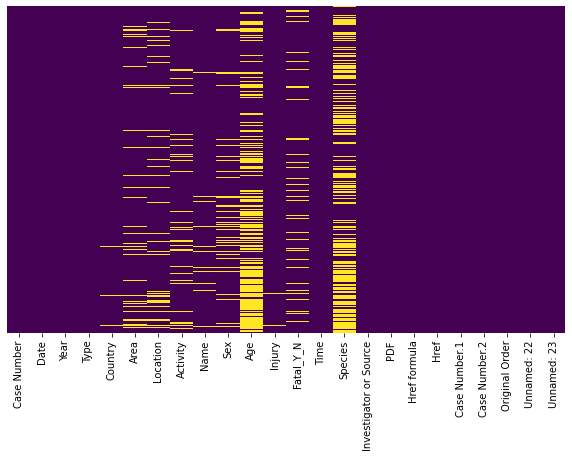

In [63]:
check_nan(data)

### Type y Activity

In [64]:
#tipo = data[['Type']]

In [65]:
#Modificar la columna de Type

data['Type'] = data['Type'].apply(lambda x : 'Boat' if x == 'Boatomg' or x == 'Boating' else x)
data.Type.unique()

array(['Boat', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan], dtype=object)

In [66]:
for i in range(data.shape[0]):
    
    if data['Case Number.1'][i] == 'Unknown':
        data['Type'][i] = 'None'
        
list(data['Type'].unique())

['Boat',
 'Unprovoked',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 nan]

In [67]:
data['Type'] = data['Type'].fillna('Unknown')
data['Type'].unique()

array(['Boat', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'Unknown'], dtype=object)

In [68]:
for i in range(data.shape[0]):
    
    if data['Case Number.1'][i] == 'Unknown':
        data['Activity'][i] = 'None'
        
list(data['Activity'].unique())

['Paddling',
 'Standing',
 'Surfing',
 'Free diving',
 'Kite surfing',
 'Swimming',
 'Fishing',
 'Walking',
 'Feeding sharks',
 'Boogie boarding',
 'Scuba diving',
 'Paddle-skiing',
 'Body boarding',
 'Windsurfing',
 'Stand-Up Paddleboarding',
 'Wading',
 'Scuba Diving',
 'Kayak fishing for sharks',
 'Cleaning fish',
 'Snorkeling',
 'Spearfishing',
 nan,
 'Diving',
 'Fishing / Wading',
 '2 boats capsized',
 'Night bathing',
 'Surfing ',
 'Kayaking / Fishing',
 'Kayaking',
 'Body surfing',
 'Swimming, poaching abalone',
 'Canoeing',
 'SUP',
 'Skimboarding',
 'Touching a shark',
 'Fishing ',
 'Attempting to lasso a shark',
 'Photo shoot',
 'Paddle boarding',
 'Kakaying',
 'Washing hands',
 'Grabbing shark for a selfie',
 'Kayak fishing',
 'Tagging sharks',
 'Surf skiing ',
 'Surf fishing',
 'Floating',
 'Cage Diving',
 'Surfng',
 'SUP Foil boarding',
 'Lobstering',
 'Fishing in Alabama Deep Fishing Rodeo',
 'Fishing for squid',
 'Fishing for sharks',
 'Floating in tube',
 'Teasing a shar

In [69]:
data['Activity'] = data['Activity'].fillna('Unknown')
data['Activity'].unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

'N nan cols: 11'

Country                    0.793399
Area                       7.219930
Location                   8.568708
Name                       3.332275
Sex                        8.965408
Age                       44.922247
Injury                     0.444303
Fatal_Y_N                  8.552840
Species                   45.033323
Investigator or Source     0.269756
Href formula               0.015868
dtype: float64

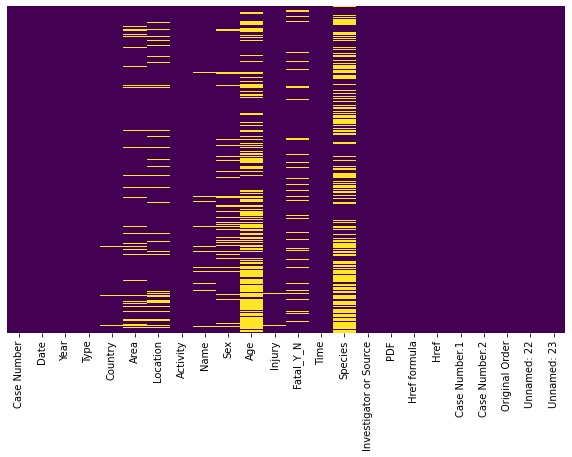

In [70]:
check_nan(data)

### Country, Area y Location

In [71]:
#Como anteriormente para facilitar la limpieza de este grupo de columnas, se realizara un grupo con 
#Country, Area y Location
#Sitio = data[['Country', 'Area', 'Location']]
#Sitio.head()

In [72]:
data['Country'] = data['Country'].fillna('No registrado')
data['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'No registrado', 'CUBA',
       'MAURITIUS', 'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS',
       'JAPAN', 'EGYPT', 'ST HELENA, British overseas territory',
       'COMOROS', 'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAI

In [73]:
#Toca modificar las columnas de este grupo
for i in range(data.shape[0]):
    
    if data['Case Number.1'][i] == 'Unknown':
        data['Country'][i] = 'None'
        
list(data['Country'].unique())


['USA',
 'AUSTRALIA',
 'MEXICO',
 'BRAZIL',
 'ENGLAND',
 'SOUTH AFRICA',
 'THAILAND',
 'COSTA RICA',
 'MALDIVES',
 'BAHAMAS',
 'NEW CALEDONIA',
 'ECUADOR',
 'MALAYSIA',
 'LIBYA',
 'No registrado',
 'CUBA',
 'MAURITIUS',
 'NEW ZEALAND',
 'SPAIN',
 'SAMOA',
 'SOLOMON ISLANDS',
 'JAPAN',
 'EGYPT',
 'ST HELENA, British overseas territory',
 'COMOROS',
 'REUNION',
 'FRENCH POLYNESIA',
 'UNITED KINGDOM',
 'UNITED ARAB EMIRATES',
 'PHILIPPINES',
 'INDONESIA',
 'CHINA',
 'COLUMBIA',
 'CAPE VERDE',
 'Fiji',
 'DOMINICAN REPUBLIC',
 'CAYMAN ISLANDS',
 'ARUBA',
 'MOZAMBIQUE',
 'FIJI',
 'PUERTO RICO',
 'ITALY',
 'ATLANTIC OCEAN',
 'GREECE',
 'ST. MARTIN',
 'FRANCE',
 'PAPUA NEW GUINEA',
 'TRINIDAD & TOBAGO',
 'KIRIBATI',
 'ISRAEL',
 'DIEGO GARCIA',
 'TAIWAN',
 'JAMAICA',
 'PALESTINIAN TERRITORIES',
 'GUAM',
 'SEYCHELLES',
 'BELIZE',
 'NIGERIA',
 'TONGA',
 'SCOTLAND',
 'CANADA',
 'CROATIA',
 'SAUDI ARABIA',
 'CHILE',
 'ANTIGUA',
 'KENYA',
 'RUSSIA',
 'TURKS & CAICOS',
 'UNITED ARAB EMIRATES (UAE)',


In [74]:
for i in range(data.shape[0]):
    
    if data['Case Number.1'][i] == 'Unknown':
        data['Area'][i] = 'None'
        
list(data['Area'].unique())

['California',
 'Georgia',
 'Hawaii',
 'New South Wales',
 'Colima',
 'Pernambuco',
 'Florida',
 'Queensland',
 'South Carolina',
 'Cornwall',
 'Westerm Australia',
 'Eastern Cape Province',
 'Hua Hin',
 'Cocos Island',
 'Western Australia',
 'Alifu Alifu Atoll',
 'Western Cape Province',
 'New Providence',
 'Alagoas',
 nan,
 'Victoria',
 'KwaZulu-Natal',
 'Boi Island, Victoria',
 'Galapagos Islands',
 'Fernando de Noronha',
 'Sepang',
 'Holquin Province',
 'Pamplemousses ',
 'South Australia',
 'North Island',
 'New York',
 'Canary Islands',
 ' Upolu Island',
 'Shizuoka Prefecture',
 'Texas',
 'Castellón',
 'Massachusetts',
 'Red Sea Protectorate',
 'New Providence District',
 '40 miles off Grand Bahama Island',
 'Ascension Island',
 'New Jersey',
 'Majorca',
 'Washington',
 'Tabasco',
 'Anjouan',
 'Ibiza Island',
 'Marquesas',
 'South Devon',
 'New Providence ',
 'Sharjah, ',
 'Baja California Sur',
 'Saint-Leu',
 'South Island',
 'Luzon Island',
 'Great Exuma',
 'Saint-Andre',
 'Bim

In [75]:
data['Area'] = data['Area'].fillna('Unknown')
data['Area'].unique()

array(['California', 'Georgia', 'Hawaii', 'New South Wales', 'Colima',
       'Pernambuco', 'Florida', 'Queensland', 'South Carolina',
       'Cornwall', 'Westerm Australia', 'Eastern Cape Province',
       'Hua Hin', 'Cocos Island', 'Western Australia',
       'Alifu Alifu Atoll', 'Western Cape Province', 'New Providence',
       'Alagoas', 'Unknown', 'Victoria', 'KwaZulu-Natal',
       'Boi Island, Victoria', 'Galapagos Islands', 'Fernando de Noronha',
       'Sepang', 'Holquin Province', 'Pamplemousses ', 'South Australia',
       'North Island', 'New York', 'Canary Islands', ' Upolu Island',
       'Shizuoka Prefecture', 'Texas', 'Castellón', 'Massachusetts',
       'Red Sea Protectorate', 'New Providence District',
       '40 miles off Grand Bahama Island', 'Ascension Island',
       'New Jersey', 'Majorca', 'Washington', 'Tabasco', 'Anjouan',
       'Ibiza Island', 'Marquesas', 'South Devon', 'New Providence ',
       'Sharjah, ', 'Baja California Sur', 'Saint-Leu', 'South Island

In [76]:
for i in range(data.shape[0]):
    
    if data['Case Number.1'][i] == 'Unknown':
        data['Location'][i] = 'None'
        
list(data['Location'].unique())

['Oceanside, San Diego County',
 'St. Simon Island, Glynn County',
 'Habush, Oahu',
 'Arrawarra Headland',
 'La Ticla',
 'Flat Rock, Ballina',
 'Piedade Beach, Recife',
 'Lighhouse Point Park, Ponce Inlet, Volusia County',
 'Cocoa Beach, Brevard  County',
 'Daytona Beach, Volusia County',
 'Cairns Aquarium',
 'Isle of Palms,  Charleston County',
 'Hilton Head Island, Beaufort County',
 "Off Land's End",
 'Dugong Bay',
 'Nahoon Beach, East London',
 'Sharpes Beach, Ballina',
 'Sai Noi Beach',
 'Manuelita',
 'Gearys Beach',
 'Lennox Head',
 'Surfers Point, Prevelly',
 'South Point, Gracetown',
 'Madoogali',
 'Robberg Beach, Plettenberg Bay',
 'Shipwreck\x92s Beach, Keoneloa Bay, Kauai',
 'Piedade',
 'Lefthanders, Margaret River Area',
 'Cobblestones, Margaret River Area',
 'Nirvana Beach',
 'Praia de Sauaçuhy, Maceió',
 'Magenta Beach, Noumea',
 'Bimini',
 'St. Francis Bay',
 'Kukio Beach',
 "Waterman's Bay",
 'Lorne',
 'Winkipop',
 'Durban',
 'Little Congwong Beach, La Perouse ',
 'West

In [77]:
data['Location'] = data['Location'].fillna('Unknown')

'N nan cols: 8'

Name                       3.332275
Sex                        8.965408
Age                       44.922247
Injury                     0.444303
Fatal_Y_N                  8.552840
Species                   45.033323
Investigator or Source     0.269756
Href formula               0.015868
dtype: float64

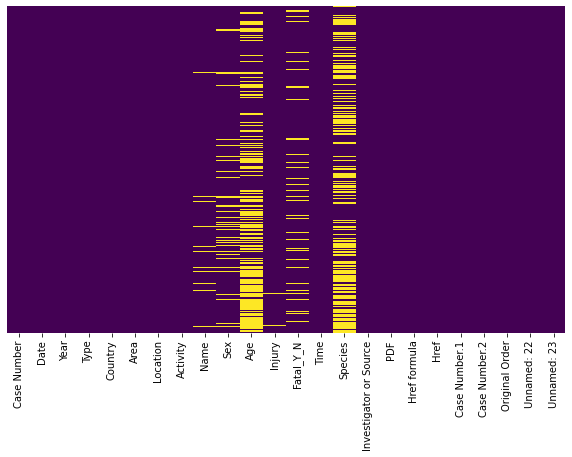

In [78]:
check_nan(data)

### Name, Age, Sex

In [79]:
#datos = data[['Name', 'Age', 'Sex']]
#datos.head()

Sex

In [80]:
for i in range(data.shape[0]):
    
    if data['Case Number.1'][i] == 'Unknown':
        data['Sex'][i] = 'None'
        
list(data['Sex'].unique())


['F', 'M', nan, 'M ', 'lli', 'N', '.']

In [81]:
def genero(string):
    
    if string != 'F' and string != 'M':
        string = 'Unknown'
        
    return string

In [82]:
data['Sex'] = data['Sex'].apply(genero)

Age

In [83]:
for i in range(data.shape[0]):
    
    if data['Case Number.1'][i] == 'Unknown':
        data['Age'][i] = 'None'
        
list(data['Age'].unique())

['57',
 '11',
 '48',
 nan,
 '18',
 '52',
 '15',
 '12',
 '32',
 '10',
 '21',
 '34',
 '30',
 '60',
 '33',
 '29',
 '54',
 '41',
 '37',
 '56',
 '19',
 '25',
 '69',
 '38',
 '55',
 '35',
 '46',
 '45',
 '14',
 '40s',
 '28',
 '20',
 '24',
 '26',
 '49',
 '22',
 '7',
 '31',
 '17',
 '40',
 '13',
 '42',
 '3',
 '8',
 '50',
 '16',
 '82',
 '73',
 '20s',
 '68',
 '51',
 '39',
 '58',
 'Teen',
 '47',
 '61',
 '65',
 '36',
 '66',
 '43',
 '60s',
 '9',
 '72',
 '59',
 '6',
 '27',
 '64',
 '23',
 '71',
 '44',
 '62',
 '63',
 '70',
 '18 months',
 '53',
 '30s',
 '50s',
 'teen',
 '77',
 '74',
 '28 & 26',
 '5',
 '86',
 '18 or 20',
 '12 or 13',
 '46 & 34',
 '28, 23 & 30',
 'Teens',
 '36 & 26',
 '8 or 10',
 '84',
 '\xa0 ',
 ' ',
 '30 or 36',
 '6½',
 '21 & ?',
 '75',
 '33 or 37',
 'mid-30s',
 '23 & 20',
 ' 30',
 '7      &    31',
 ' 28',
 '20?',
 "60's",
 '32 & 30',
 '16 to 18',
 '87',
 '67',
 'Elderly',
 'mid-20s',
 'Ca. 33',
 '74 ',
 '45 ',
 '21 or 26',
 '20 ',
 '>50',
 '18 to 22',
 'adult',
 '9 & 12',
 '? & 19',
 '9

In [84]:
data.Age = data.Age.fillna('Unknown')

In [85]:
data.Age = data.Age.astype(str)

In [86]:
def edad(string):
    
    if len(string) > 2:
        string = string.split(' ')[0]
        
    return string

In [87]:
data.Age = data.Age.apply(edad)

In [88]:
data.Age.head()

0         57
1         11
2         48
3    Unknown
4    Unknown
Name: Age, dtype: object

In [89]:
for i in range(data.shape[0]):
    
    if data['Case Number.1'][i] == 'Unknown':
        data['Name'][i] = 'None'
        
list(data['Name'].unique())

['Julie Wolfe',
 'Adyson\xa0McNeely ',
 'John Denges',
 'male',
 'Gustavo Ramos ',
 'Chris \x85',
 'Jose Ernesto da Silva ',
 'Cody High',
 'Trey de Boer',
 'Jei Turrell',
 'Max Berryman',
 'Melisa Brunning',
 'female',
 'Adam Murray',
 'Matthew Lee',
 'Rob Bruce',
 'Nathan Burch',
 'Ahmed Rasheed',
 'Dylan McWilliams',
 'Werner Danielsen',
 'Pablo de Melo',
 'Jason Longrass',
 'Alejandro Travaglini',
 'Bruce Rowan',
 'Josias Paz',
 nan,
 'Shane McConnell',
 'Ross Spowart',
 'Luke Guy & Finn Bald',
 'Rob Crossland',
 'Lachie Brown',
 'Elton Polly',
 'Anna Shurapey ',
 'Brett Palmer',
 'Adam Hoare',
 'Sharna Babd',
 'Rosalida Souza',
 'Andrew Phipps Newman',
 'Lucas Martin',
 'Mathew Vickers',
 'Callum Stewart',
 'Ricardo Ferrari Bulhoes ',
 'Justin ',
 'Marjorie Mariano',
 'Natalie Jones',
 'Sairol  Harun',
 'Sarah Illig-Carroll',
 '__ Jimenez',
 'Rohina Bhandari',
 '31 migrants',
 'Grigor Azatian',
 'Kaia Anderson',
 'Timur Yunusov',
 'Charlie Fry',
 'Jesús Cabrera González ',
 'Jack 

In [90]:
data['Name'] = data['Name'].fillna('Unknown')
data['Name'].unique()

array(['Julie Wolfe', 'Adyson\xa0McNeely ', 'John Denges', ...,
       'A "chiefess"', 'Ahmun', 'Jules Patterson'], dtype=object)

'N nan cols: 5'

Injury                     0.444303
Fatal_Y_N                  8.552840
Species                   45.033323
Investigator or Source     0.269756
Href formula               0.015868
dtype: float64

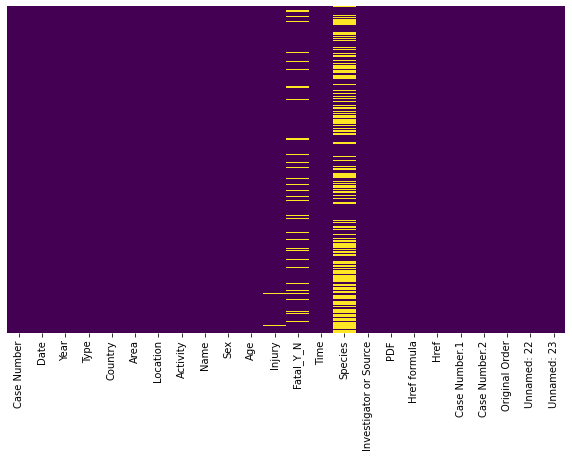

In [91]:
check_nan(data)

### Injury  y Fatal

In [92]:
#accidente = data[['Injury', 'Fatal (Y/N)']]
#accidente.head()

'N nan cols: 5'

Injury                     0.444303
Fatal_Y_N                  8.552840
Species                   45.033323
Investigator or Source     0.269756
Href formula               0.015868
dtype: float64

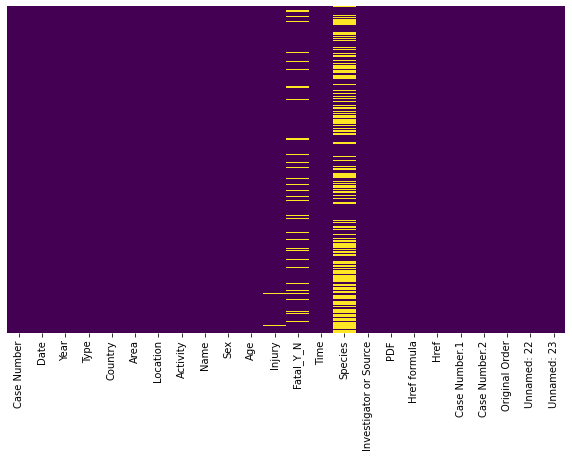

In [93]:
check_nan(data)

In [94]:
for i in range(data.shape[0]):
    
    if data['Case Number.1'][i] == 'Unknown':
        data['Fatal_Y_N'][i] = 'None'
        
list(data['Fatal_Y_N'].unique())

['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y']

In [95]:
data['Fatal_Y_N'] = data['Fatal_Y_N'].fillna('Unknown')
data['Fatal_Y_N'].unique()

array(['N', 'Y', 'Unknown', 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [96]:
for i in range(data.shape[0]):
    
    if data['Case Number.1'][i] == 'Unknown':
        data['Injury'][i] = 'None'
        
list(data['Injury'].unique())

['No injury to occupant, outrigger canoe and paddle damaged',
 'Minor injury to left thigh',
 'Injury to left lower leg from surfboard skeg',
 'Minor injury to lower leg',
 'Lacerations to leg & hand shark PROVOKED INCIDENT',
 'No injury, board bitten',
 'FATAL',
 'Minor injury to foot. PROVOKED INCIDENT',
 'Lower left leg bitten',
 'Minor injury to foot',
 'Minor bite to hand by captive shark. PROVOKED INCIDENT',
 'Injuries to lower right leg and foot',
 'Severe bite to right forearm',
 'Injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'Shallow lacerations to finger PROVOKED INCIDENT',
 'Minor injury, marks on board',
 'No injury, surfboard damaged',
 'Minor injury to ankle',
 'No injury, shark bit scuba gear',
 'No injury, knocked off board by shark',
 'No injury',
 'No injury, shark struck his leg',
 '5-inch cut to hand',
 'No injury, shark bit hole in ski',
 'Lacerations to right lower leg',
 'Lacerations to foot and ankle',
 'Multiple severe injuries to arms

In [97]:
data['Injury'] = data['Injury'].fillna('Unknown')
data['Injury'].unique()

array(['No injury to occupant, outrigger canoe and paddle damaged',
       'Minor injury to left thigh',
       'Injury to left lower leg from surfboard skeg', ...,
       'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

'N nan cols: 3'

Species                   45.033323
Investigator or Source     0.269756
Href formula               0.015868
dtype: float64

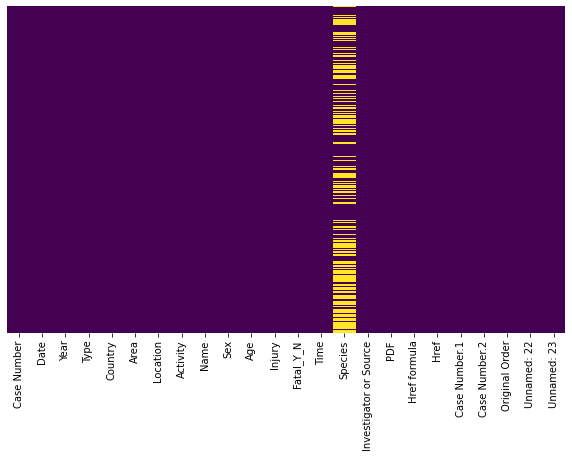

In [98]:
check_nan(data)

### Species

In [99]:
#especie = data[['Species']]
#especie.head()

In [100]:
for i in range(data.shape[0]):
    
    if data['Case Number.1'][i] == 'Unknown':
        data['Species'][i] = 'None'
        
list(data['Species'].unique())

['White shark',
 nan,
 '2 m shark',
 'Tiger shark, 3m',
 'Tiger shark',
 "Lemon shark, 3'",
 "Bull shark, 6'",
 'Grey reef shark',
 'Invalid incident',
 'Tawny nurse shark, 2m',
 'Shark involvement not confirmed',
 'Questionable',
 '3 m shark',
 'White shark, 3.5 m',
 'White shark, 2.5 m',
 "6' shark",
 'Juvenile bull shark',
 'Bull shark',
 "Tiger shark, 12'",
 'Wobbegong shark',
 '3.5 m shark',
 '1.8 m shark',
 'Blacktip shark',
 'Juvenile white shark,  2.7 to 3.2 m',
 'Bull shark, 2 m',
 'Possibly a wobbegong',
 'Injury believed caused by an eel, not a shark',
 'Galapagos shark?',
 '2m shark',
 'Bull shark, 3 m ',
 'Grey reef shark. 2 m',
 'small shark',
 'Wobbegong shark?',
 'Juvenile nurse shark',
 "Nurse shark. 5'",
 'Tiger shark, female',
 'Some drowned but other may have been killed by blue sharks',
 'White shark, 4.6 m',
 'Cookiecutter shark',
 'Wobbegong shark, 1 m',
 'White shark, 4.5 m',
 'Spinner shark, 4 to 5 feet',
 'Tiger shark, 8 to 10 feet',
 "8' shark",
 'Death may h

In [101]:
data['Species'] = data['Species'].fillna('Unknown')
data['Species'].unique()

array(['White shark', 'Unknown', '2 m shark', ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

'N nan cols: 2'

Investigator or Source    0.269756
Href formula              0.015868
dtype: float64

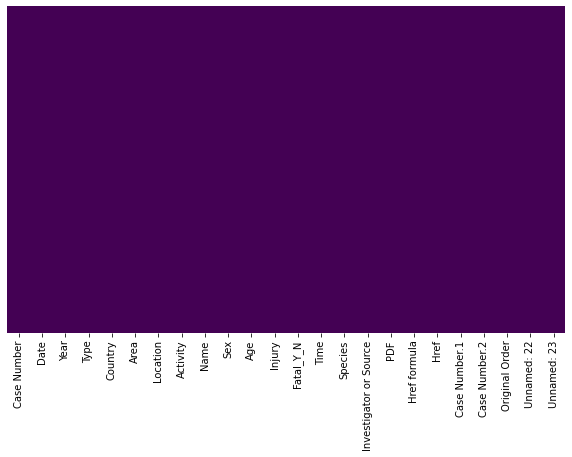

In [102]:
check_nan(data)

### Investigacion y Href formula

In [103]:
#inves = data[['Investigator or Source', 'Href formula']]
#inves.head()

In [104]:
for i in range(data.shape[0]):
    
    if data['Case Number.1'][i] == 'Unknown':
        data['Investigator or Source'][i] = 'None'
        
list(data['Investigator or Source'].unique())

['R. Collier, GSAF',
 'K.McMurray, TrackingSharks.com',
 'B. Myatt, GSAF',
 'A .Kipper',
 'Daily Telegraph, 6/4/2018',
 'Diario de Pernambuco, 6/4/2018',
 'K. McMurray, TrackingSharks.com',
 'K. McMurray, Tracking Sharks.com',
 'ABC.net.au ,05/24/2018',
 'C. Creswell, GSAF',
 'C. Creswell, GSAF & K. McMurray TrackingSharks.com',
 'Perth Now, 6/30/2018',
 'B.Jacob, Dispatch Live, 5/12/2018',
 'Costa Rica Star. 4/28/2018',
 'B.Myatt, GSAF',
 'Africa News Agency, 4/22/2018',
 'The Garden Island, 4/19/2018',
 'Straits Times, 4/16/2018',
 'Globo, 4/16/2018',
 'Tribune242,',
 'Les Nouvelles Caledoniennes, 4/10/2018',
 'Khon2, 3/31/2018',
 'International Business Times, 3/1/2018',
 'Sunshine Coast Daily, 2/15/2018',
 'TrackingSharks.com',
 'The Standard (UK), 2/6/2018',
 'The West Australian, 2/2/2018',
 'ABC.net.au, 01/28/2018',
 'Perth Now, 1/6/2018',
 'J. Howard, Surfling Now, 1/2/2018',
 'R. Collier',
 'Daily Star, 12/11/2017',
 'R. Arauz',
 'TG Com 24, 11/25/2017',
 'Florida Today, 11/21

In [105]:
data['Investigator or Source'] = data['Investigator or Source'].fillna('Unknown')
data['Investigator or Source'].unique()

array(['R. Collier, GSAF', 'K.McMurray, TrackingSharks.com',
       'B. Myatt, GSAF', ..., 'F. Schwartz, p.23; C. Creswell, GSAF',
       'The Sun, 10/20/1938', 'S.W. Baker'], dtype=object)

In [106]:
for i in range(data.shape[0]):
    
    if data['Case Number.1'][i] == 'Unknown':
        data['Href formula'][i] = 'None'
        
list(data['Href formula'].unique())


['http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.08-Arrawarra.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.04-Ramos.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.b-FlatRock.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.a-daSilva.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.27-Ponce.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.26.b-High.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.26.a-DaytonaBeach.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.24-CairnsAquarium.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.21-deBoer.pdf',
 'http://sharkat

In [107]:
data['Href formula'] = data['Href formula'].fillna('Unknown')
data['Href formula'].unique()


array(['http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf',
       ...,
       'http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0003-Ocracoke_1900-1905.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0002-JulesPatterson.pdf',
       'http://sharkattackfile.net/spreadsheets/pdf_directoryND-0001-Ceylon.pdf'],
      dtype=object)

'N nan cols: 0'

Series([], dtype: float64)

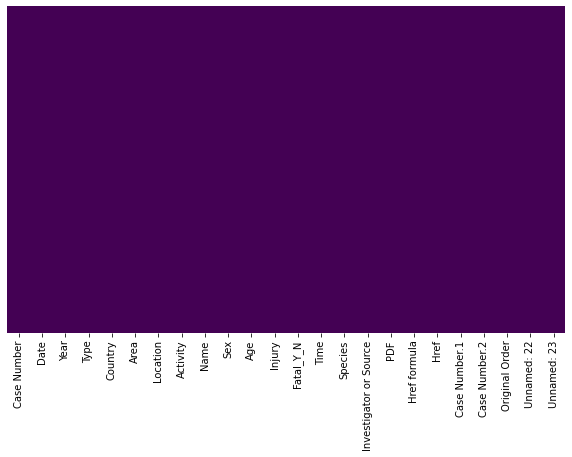

In [108]:
check_nan(data)

# Datos Finales

In [109]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,PDF,Href formula,Href,Case Number.1,Case Number.2,Original Order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,Unknown,Unknown
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,Unknown,Unknown
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,Unknown,Unknown
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,Unknown,Unknown
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,Unknown,Unknown


In [110]:
data.shape

(6302, 24)

In [111]:
data = data[~(data['Year'] < '1980-12-31')] #Lo he buscado por internet

In [112]:
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,PDF,Href formula,Href,Case Number.1,Case Number.2,Original Order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,Unknown,Unknown
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,Unknown,Unknown
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,Unknown,Unknown
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,Unknown,Unknown
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,ND.0027,No date,date,Unprovoked,GREECE,Dodecanese Islands,Symi Island,Sponge diving,Psarofa-gomenes,M,...,Unknown,M. N. Kalafatas,ND-0027-Psarofagomenos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0027,ND.0027,28.0,Unknown,Unknown
6276,ND.0026,Early 1930s,930s,Unprovoked,BELIZE,Unknown,Unknown,Standing,a servant,M,...,12' tiger shark,Mitchell-Hedges,ND-0026-Belize.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0026,ND.0026,27.0,Unknown,Unknown
6279,ND.0023,No date,date,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Wading,Madelaine Dalton,F,...,Unknown,"L. Green in Tavern of the Seas, p.182",ND-0023-Dalton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0023,ND.0023,24.0,Unknown,Unknown
6280,ND.0022,No date,date,Unprovoked,AUSTRALIA,Unknown,Unknown,Pearl diving,Jaringoorli,M,...,Unknown,"Adelaide Advertiser, 1/11/1940",ND-0022-Jaringoorli.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0022,ND.0022,23.0,Unknown,Unknown


In [113]:
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,PDF,Href formula,Href,Case Number.1,Case Number.2,Original Order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,Unknown,Unknown
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,Unknown,Unknown
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,Unknown,Unknown
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,Unknown,Unknown
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,ND.0027,No date,date,Unprovoked,GREECE,Dodecanese Islands,Symi Island,Sponge diving,Psarofa-gomenes,M,...,Unknown,M. N. Kalafatas,ND-0027-Psarofagomenos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0027,ND.0027,28.0,Unknown,Unknown
6276,ND.0026,Early 1930s,930s,Unprovoked,BELIZE,Unknown,Unknown,Standing,a servant,M,...,12' tiger shark,Mitchell-Hedges,ND-0026-Belize.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0026,ND.0026,27.0,Unknown,Unknown
6279,ND.0023,No date,date,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Wading,Madelaine Dalton,F,...,Unknown,"L. Green in Tavern of the Seas, p.182",ND-0023-Dalton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0023,ND.0023,24.0,Unknown,Unknown
6280,ND.0022,No date,date,Unprovoked,AUSTRALIA,Unknown,Unknown,Pearl diving,Jaringoorli,M,...,Unknown,"Adelaide Advertiser, 1/11/1940",ND-0022-Jaringoorli.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0022,ND.0022,23.0,Unknown,Unknown


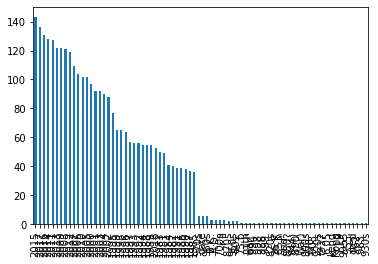

In [114]:
data.Year.value_counts().plot.bar();

In [115]:
data.Year.value_counts()

2015    143
2017    136
2016    131
2014    128
2011    127
       ... 
955       1
rted      1
962       1
963       1
930s      1
Name: Year, Length: 78, dtype: int64

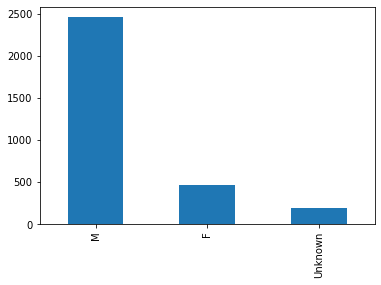

In [116]:
data.Sex.value_counts().plot.bar();

In [117]:
data.Sex.value_counts()

M          2455
F           466
Unknown     197
Name: Sex, dtype: int64

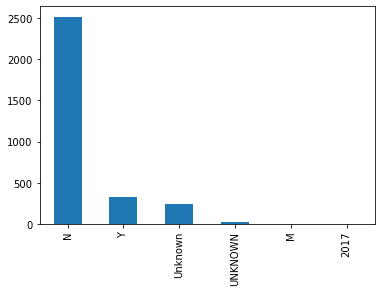

In [118]:
data.Fatal_Y_N.value_counts().plot.bar();

In [119]:
data.Fatal_Y_N.value_counts()

N          2519
Y           332
Unknown     241
UNKNOWN      24
M             1
2017          1
Name: Fatal_Y_N, dtype: int64

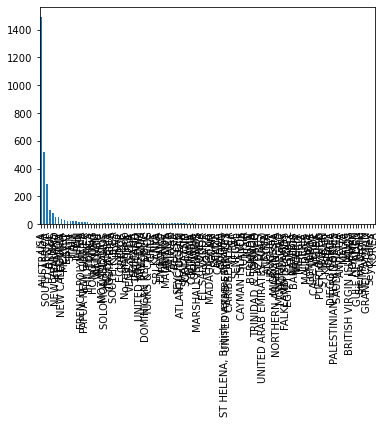

In [120]:
data.Country.value_counts().plot.bar();

In [121]:
data.Country.value_counts()

USA             1492
AUSTRALIA        520
SOUTH AFRICA     286
BRAZIL           100
BAHAMAS           80
                ... 
Sierra Leone       1
ST. MAARTIN        1
GRAND CAYMAN       1
Seychelles         1
KOREA              1
Name: Country, Length: 115, dtype: int64

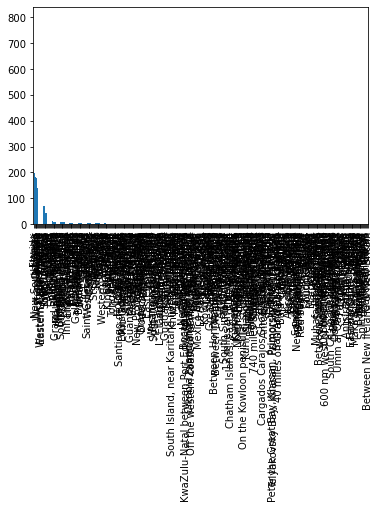

In [122]:
data.Area.value_counts().plot.bar();

In [123]:
data.Area.value_counts()

Florida                              801
Hawaii                               197
New South Wales                      184
California                           179
Unknown                              138
                                    ... 
North Devon                            1
US Virgin Islands                      1
San Carlos                             1
Cabo San Lucas                         1
Between New Ireland & New Britain      1
Name: Area, Length: 373, dtype: int64

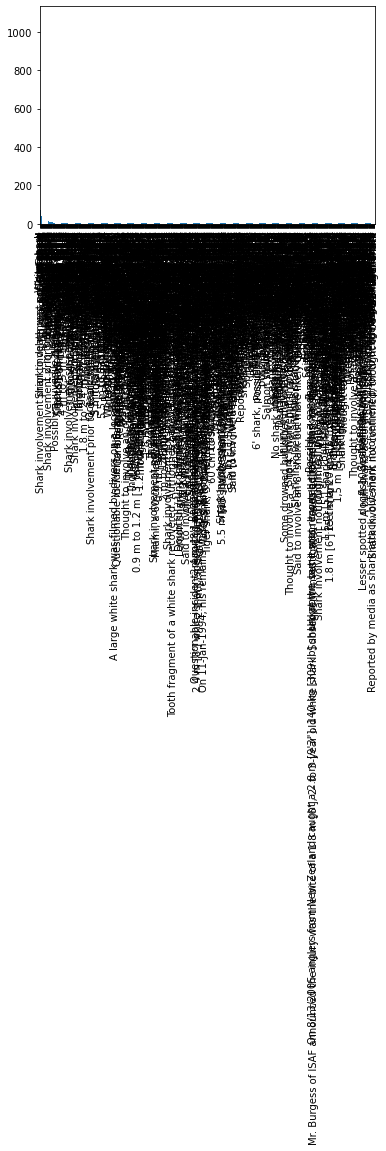

In [124]:
data.Species.value_counts().plot.bar();

In [125]:
data.Species.value_counts()

Unknown                                                                                      1079
White shark                                                                                   106
Shark involvement not confirmed                                                                69
Tiger shark                                                                                    46
Shark involvement prior to death was not confirmed                                             44
                                                                                             ... 
Tiger shark, 13' female                                                                         1
Reported by media as shark attack, but shark involvement prior to death was not confirmed       1
Shark involvement not confirmed; thought to be a barracuda bite                                 1
1.5' to 2' shark                                                                                1
12' tiger shark     